In [70]:
# 导入数据分析需要的包
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.linear_model as LM
import statsmodels.api as sm
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
# 显示中文
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [71]:
# 导入数据集
df=pd.read_csv('Bank Customer Churn Prediction.csv',header=0)
#df = df.set_index(['ID'])
# 查看数据
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
#数据类型处理
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [73]:
class Gender:
    def __init__(self, gender):
        self.gender = gender
    def personInfo(self):
        if self.gender == 'Female':
            sex = 1
        else:
            sex = 0
        print("性别：",self.gender, " 转换后的性别：",sex)

In [74]:
per1=Gender('Female')
per2=Gender('Male')
per1.personInfo()
per2.personInfo()

性别： Female  转换后的性别： 1
性别： Male  转换后的性别： 0


In [75]:
df['gender'].replace( 'Female', 1,inplace = True)
df['gender'].replace( 'Male',  0,inplace = True)
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [76]:
class Country:
    def __init__(self, country):
        self.country = country
    def personInfo(self):
        if self.country == 'France':
            coun = 0
        else:
            if self.country == 'Germany':
                coun = 1
            else:
                coun = 2
        print("国家：",self.country, " 转换后的国家：",coun)

In [77]:
per1=Country('France')
per2=Country('Germany')
per3=Country('Spain')
per1.personInfo()
per2.personInfo()
per3.personInfo()

国家： France  转换后的国家： 0
国家： Germany  转换后的国家： 1
国家： Spain  转换后的国家： 2


In [78]:
df['country'].replace( 'France', 0,inplace = True)
df['country'].replace( 'Germany',1,inplace = True)
df['country'].replace( 'Spain',  2,inplace = True)
df['country'].head()

0    0
1    2
2    0
3    0
4    2
Name: country, dtype: int64

In [79]:
#缺失值
flag = df.isnull()
flag.sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [80]:
def ERROR(df):
    flag = df.isnull()
    if flag.sum().sum():
        print('存在缺失值')
        raise ValueError
    else:
        print('不存在缺失值')
ERROR(df)

不存在缺失值


In [81]:
#随机森林填补缺失值
def set_missing(df):
    process_df = df.iloc[:,[1,0,2,3,4,5,6,7,8,9,10,11]]
    known = process_df[process_df.credit_score()].as_matrix()
    unknown = process_df[process_df.credit_score.isnull()].as_matrix()
    X = known[:, 1:]
    y = known[:, 0]
    rfr = RandomForestRegressor(random_state=0, 
    n_estimators=200,max_depth=3,n_jobs=-1)
    rfr.fit(X,y)
    predicted = rfr.predict(unknown[:, 1:]).round(0)
    print(predicted)
    df.loc[(df.credit_score.isnull()), 'credit_score'] = predicted
    return df

In [82]:
data=df.copy()
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,0,42,3,75075.31,2,1,0,92888.52,1


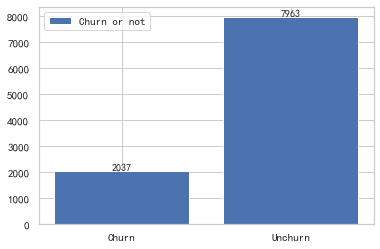

In [83]:
#频数直方图
YES = list(df['churn']).count(1)
NO = list(df['churn']).count(0)
x = ['Churn','Unchurn']
PAY = [YES,NO]
for a, b in zip(x, PAY):
    plt.text(a, b + 2, b, ha='center', va='bottom')
plt.bar(x,height=PAY,label="Churn or not")
plt.legend(loc="upper left")
plt.show()

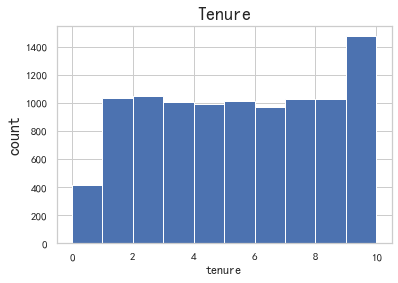

In [84]:
#年龄分布直方图
plt.hist(df['tenure'])
plt.title("Tenure",fontsize=18)
plt.xlabel("tenure")
plt.ylabel('count',fontsize=16)
plt.show()

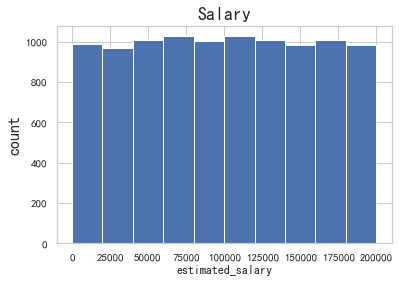

In [85]:
#工资分布直方图
plt.hist(df['estimated_salary'])
plt.title("Salary",fontsize=18)
plt.xlabel("estimated_salary")
plt.ylabel('count',fontsize=16)
plt.show()

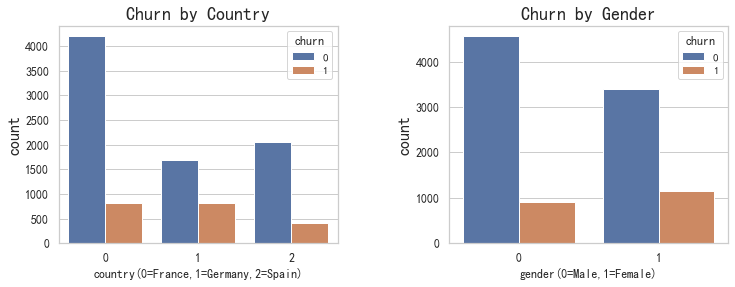

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.subplot(1,2,1) 
# palette参数表示设置颜色
gender=sns.countplot(x='country',hue="churn",data=df) 
plt.xlabel("country(0=France,1=Germany,2=Spain)")
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)     # 设置坐标轴字体大小
plt.title("Churn by Country",fontsize=18)

plt.subplot(1,2,2)
seniorcitizen=sns.countplot(x="gender",hue="churn",data=df)
plt.xlabel("gender(0=Male,1=Female)")
plt.title("Churn by Gender",fontsize=18)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # 设置坐标轴字体大小
plt.show()

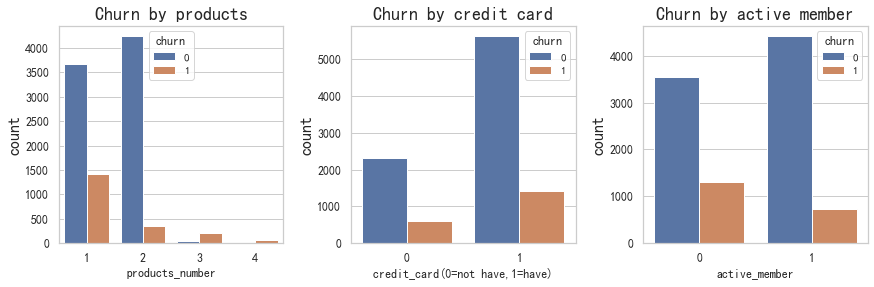

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(14.5,4))
fig.subplots_adjust(hspace=0.4,wspace=0.3)
plt.subplot(1,3,1) 
# palette参数表示设置颜色
gender=sns.countplot(x='products_number',hue="churn",data=df) 
plt.xlabel("products_number")
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)     # 设置坐标轴字体大小
plt.title("Churn by products",fontsize=18)

plt.subplot(1,3,2)
seniorcitizen=sns.countplot(x="credit_card",hue="churn",data=df)
plt.xlabel("credit_card(0=not have,1=have)")
plt.title("Churn by credit card",fontsize=18)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # 设置坐标轴字体大小

plt.subplot(1,3,3)
seniorcitizen=sns.countplot(x="active_member",hue="churn",data=df)
plt.xlabel("active_member")
plt.title("Churn by active member",fontsize=18)
plt.ylabel('count',fontsize=16)
plt.tick_params(labelsize=12)   # 设置坐标轴字体大小
plt.show()

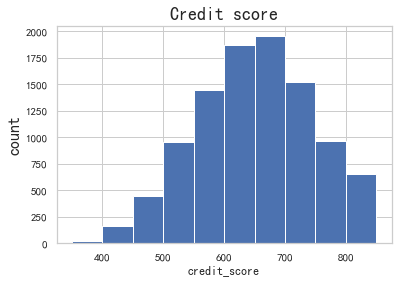

In [88]:
#信用评分分布直方图
plt.hist(df['credit_score'])
plt.title("Credit score",fontsize=18)
plt.xlabel("credit_score")
plt.ylabel('count',fontsize=16)
plt.show()

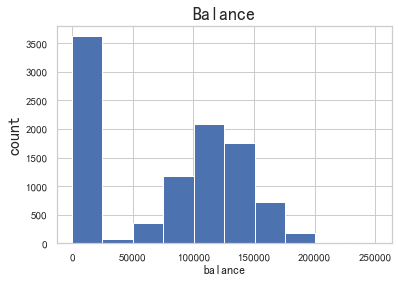

In [89]:
#平衡分布直方图
plt.hist(df['balance'])
plt.title("Balance",fontsize=18)
plt.xlabel("balance")
plt.ylabel('count',fontsize=16)
plt.show()

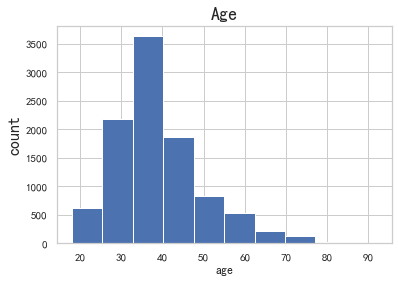

In [90]:
#年龄分布直方图
plt.hist(df['age'])
plt.title("Age",fontsize=18)
plt.xlabel("age")
plt.ylabel('count',fontsize=16)
plt.show()

In [91]:
# 导入数据集
data=df.copy()
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [92]:
customer_id=df['customer_id']
data.drop("customer_id",axis=1, inplace=True)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [93]:
# 归一化
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler(copy=False)
scaler.fit_transform(df[['balance','estimated_salary','credit_score']])
data[['balance','estimated_salary','credit_score']]=scaler.transform(data[['balance','estimated_salary','credit_score']])
data[['balance','estimated_salary','credit_score']].head()

,balance,estimated_salary,credit_score
0,-1.225848,0.021886,-0.326221
1,0.117350,0.216534,-0.440036
2,1.333053,0.240687,-1.536794
3,-1.225848,-0.108918,0.501521
4,0.785728,-0.365276,2.063884


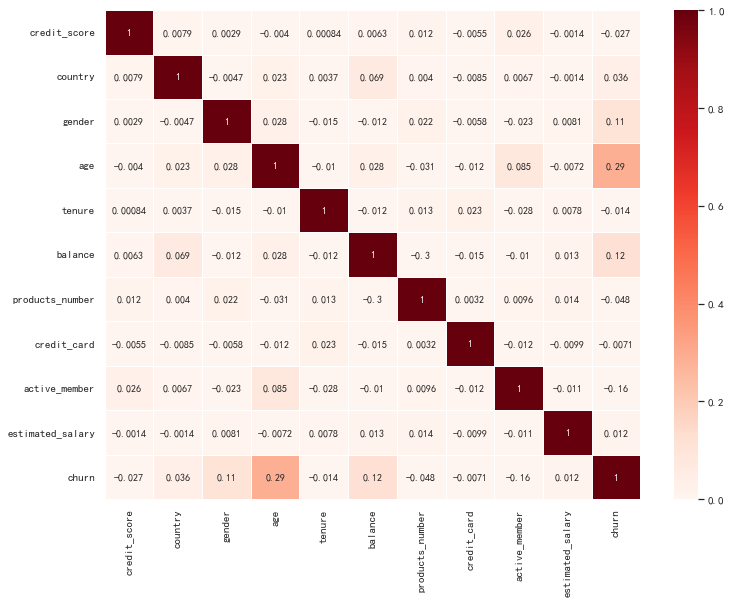

In [94]:
#相关性分析
plt.figure(figsize=[12, 9])
sns.heatmap(data.corr(), vmin=0, vmax=1, cmap="Reds", linewidths=0.5, annot=True)
plt.show()

In [95]:
data.drop(['estimated_salary','credit_card'], inplace=True, axis =1)
# 深拷贝
data1=data.copy()
X=data.copy()
X.drop(['churn'],axis=1, inplace=True)
y=data["churn"]
#查看预处理后的数据
X

,credit_score,country,gender,age,tenure,balance,products_number,active_member
0,-0.326221,0,1,42,2,-1.225848,1,1
1,-0.440036,2,1,41,1,0.117350,1,1
2,-1.536794,0,1,42,8,1.333053,3,0
3,0.501521,0,1,39,1,-1.225848,2,0
4,2.063884,2,1,43,2,0.785728,1,1
...,...,...,...,...,...,...,...,...
9995,1.246488,0,0,39,5,-1.225848,2,0
9996,-1.391939,0,0,35,10,-0.306379,1,1
9997,0.604988,0,1,36,7,-1.225848,1,1
9998,1.256835,1,0,42,3,-0.022608,2,0


In [96]:
Y=data['churn']
X=data.drop(['churn'],axis=1)
X1=sm.add_constant(X)
logit=sm.Logit(Y,X1)
result=logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.435059
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 10 Jan 2023   Pseudo R-squ.:                  0.1393
Time:                        19:28:21   Log-Likelihood:                -4350.6
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                7.775e-299
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.0845      0.143    -28.530      0.000      -4.365      -3.804
credit_score  

In [97]:
data = data.drop(['tenure','products_number'],axis=1)
data

,credit_score,country,gender,age,balance,active_member,churn
0,-0.326221,0,1,42,-1.225848,1,1
1,-0.440036,2,1,41,0.117350,1,0
2,-1.536794,0,1,42,1.333053,0,1
3,0.501521,0,1,39,-1.225848,0,0
4,2.063884,2,1,43,0.785728,1,0
...,...,...,...,...,...,...,...
9995,1.246488,0,0,39,-1.225848,0,0
9996,-1.391939,0,0,35,-0.306379,1,0
9997,0.604988,0,1,36,-1.225848,1,1
9998,1.256835,1,0,42,-0.022608,0,1


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const            16.966529
credit_score      1.001397
country           1.006029
gender            1.012236
age               1.109775
balance           1.019458
active_member     1.045394
churn             1.157601
dtype: float64

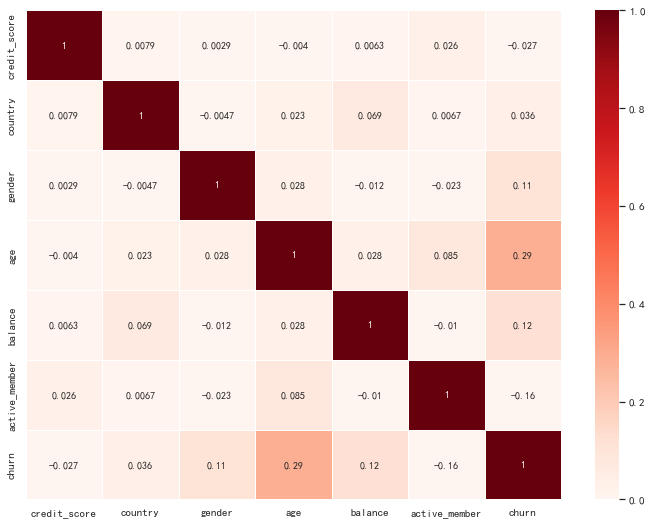

In [99]:
# 使用credit.corr()计算相关系数后画出热力图
plt.figure(figsize=[12, 9])
sns.heatmap(data.corr(), vmin=0, vmax=1, cmap="Reds", linewidths=0.5, annot=True)
plt.show()

In [100]:
X=data.copy()
X.drop(['churn'],axis=1, inplace=True)
y=data["churn"]
#查看预处理后的数据
X.head()

,credit_score,country,gender,age,balance,active_member
0,-0.326221,0,1,42,-1.225848,1
1,-0.440036,2,1,41,0.117350,1
2,-1.536794,0,1,42,1.333053,0
3,0.501521,0,1,39,-1.225848,0
4,2.063884,2,1,43,0.785728,1


In [101]:
# 保存数据集
data1.to_csv('./afterprocess.csv')

In [25]:
# 将数据集分成训练集和测试集，比例为7:3
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  # 网格搜索
# 把整体数据集进行切分
# test_size = 0.3, 表示30%的数据作为测试集合，
# 剩余70%的数据作为训练集；state=0在切分时进行数据重洗牌的标识位。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 8)
print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量:  ", len(X_test))
print("原始样本总数: ", len(X_train)+len(X_test))
X_train.head()

原始训练集包含样本数量:  7500
原始测试集包含样本数量:   2500
原始样本总数:  10000


,credit_score,country,gender,age,balance,active_member
7936,-1.888585,0,0,22,-1.225848,0
9944,0.967126,1,0,41,1.825864,1
3327,1.567239,2,0,40,-1.225848,1
2648,0.977472,0,0,21,0.984458,1
2529,0.677416,0,1,29,0.183679,1


In [26]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
model

LogisticRegression(max_iter=10000)

In [27]:
y_pred = model.predict(X_test)
print(y_pred[:30])

[0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8084

In [29]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba)

[[0.60083037 0.39916963]
 [0.57133821 0.42866179]
 [0.79801351 0.20198649]
 ...
 [0.74654452 0.25345548]
 [0.75912069 0.24087931]
 [0.88138852 0.11861148]]


In [30]:
a = pd.DataFrame(y_pred_proba,columns=['churn','no churn'])
a.head()

,churn,no churn
0,0.600830,0.399170
1,0.571338,0.428662
2,0.798014,0.201986
3,0.174246,0.825754
4,0.475098,0.524902


In [31]:
def coef():
    return model.coef_
coef()

array([[-0.05305017,  0.07381973,  0.55113029,  0.07024953,  0.30755171,
        -1.00427946]])

In [32]:
def intercept():
    return model.intercept_
intercept()

array([-4.11739122])

In [33]:
#模型评估
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pred)
m

array([[1941,   62],
       [ 417,   80]], dtype=int64)

In [34]:
b = pd.DataFrame(m,index=['0 realChurn','1 realUnchurn'],columns=['0 predChurn','1 predUnchurn'])
b

,0 predChurn,1 predUnchurn
0 realChurn,1941,62
1 realUnchurn,417,80


In [35]:
#模型评估：ROC曲线
from sklearn.metrics import roc_curve
fpr,tpr,thres = roc_curve(y_test,y_pred_proba[:,1])
c = pd.DataFrame()
c['Threshold'] = list(thres)
c['FPR'] = list(fpr)
c['TPR'] = list(tpr)
c.head()

,Threshold,FPR,TPR
0,1.845485,0.000000,0.000000
1,0.845485,0.000000,0.002012
2,0.818614,0.000999,0.002012
3,0.804035,0.000999,0.004024
4,0.802419,0.001498,0.004024


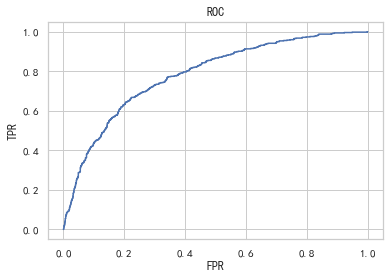

In [36]:
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

0.7830743823901974

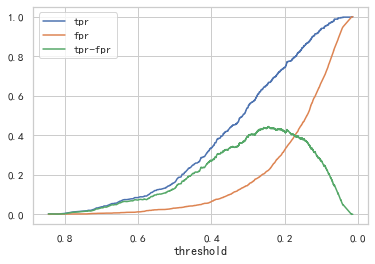

In [38]:
# KS曲线
plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr','fpr','tpr-fpr'])
plt.gca().invert_xaxis()
plt.show()

In [39]:
max(tpr-fpr)

0.44434354504460616

In [40]:
data

,credit_score,country,gender,age,balance,active_member,churn
0,-0.326221,0,1,42,-1.225848,1,1
1,-0.440036,2,1,41,0.117350,1,0
2,-1.536794,0,1,42,1.333053,0,1
3,0.501521,0,1,39,-1.225848,0,0
4,2.063884,2,1,43,0.785728,1,0
...,...,...,...,...,...,...,...
9995,1.246488,0,0,39,-1.225848,0,0
9996,-1.391939,0,0,35,-0.306379,1,0
9997,0.604988,0,1,36,-1.225848,1,1
9998,1.256835,1,0,42,-0.022608,0,1


## KNN

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# 3.模型训练
# 3.1 实例化分类器
estimator = KNeighborsClassifier(n_neighbors=9)

# 3.2 使用交叉验证网格搜索
# estimator-->分类器
# param_grid-->指定的数据
# cv=5-->5折交叉验证
params_grid = {"n_neighbors":[1,3,5,7,9,11]}
estimator = GridSearchCV(estimator,param_grid=params_grid,cv=5)

# 3.3 模型训练
estimator.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [43]:
# 4.模型评估
# 4.1 传入测试集数据 预测出来的结果跟实际的测试集结果和真实结果
y_pre = estimator.predict(X_test)
print(y_pre)
print(y_test)

[1 0 0 ... 0 0 0]
837     0
697     1
1197    0
6759    0
5651    0
       ..
1765    0
7854    0
5894    0
5049    0
8864    0
Name: churn, Length: 2500, dtype: int64


In [44]:
# 4.2 输出准确率 注意：X-->测试集特征 y-->测试集真实结果
ret = estimator.score(X_test,y_test)
print("准确率：",ret)

准确率： 0.832


In [45]:
print('最好的模型：',estimator.best_estimator_)
print('最好的得分：',estimator.best_score_)
print('最好的结果：',estimator.cv_results_)

最好的模型： KNeighborsClassifier(n_neighbors=9)
最好的得分： 0.8137333333333334
最好的结果： {'mean_fit_time': array([0.00718493, 0.00681057, 0.00642433, 0.00618582, 0.0059761 ,
       0.00680528]), 'std_fit_time': array([7.41417910e-04, 4.08273689e-04, 4.90584348e-04, 4.15915219e-04,
       5.49202980e-05, 4.16452813e-04]), 'mean_score_time': array([0.01881318, 0.02138867, 0.02099066, 0.02201729, 0.02280326,
       0.02299881]), 'std_score_time': array([4.07224081e-04, 1.00380114e-03, 4.39372258e-05, 4.11041928e-05,
       3.52350990e-04, 4.24366318e-05]), 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}], 'split0_test_score': array([0.744     , 0.78466667, 0.79      , 0.796     , 0.806     ,
       0.80133333]), 'split1_test_score': array([0.752     ,

In [46]:
y_pre_proba = estimator.predict_proba(X_test)
print(y_pre_proba)

[[0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.88888889 0.11111111]
 ...
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]]


In [47]:
a = pd.DataFrame(y_pre_proba,columns=['churn','no churn'])
a.head()

,churn,no churn
0,0.333333,0.666667
1,0.666667,0.333333
2,0.888889,0.111111
3,0.888889,0.111111
4,0.555556,0.444444


In [48]:
m = confusion_matrix(y_test,y_pre)
m

array([[1892,  111],
       [ 309,  188]], dtype=int64)

In [49]:
b = pd.DataFrame(m,index=['0 realChurn','1 realUnchurn'],columns=['0 predChurn','1 predUnchurn'])
b

,0 predChurn,1 predUnchurn
0 realChurn,1892,111
1 realUnchurn,309,188


In [50]:
#模型评估：ROC曲线
from sklearn.metrics import roc_curve
fpr,tpr,thres = roc_curve(y_test,y_pre_proba[:,1])
c = pd.DataFrame()
c['Threshold'] = list(thres)
c['FPR'] = list(fpr)
c['TPR'] = list(tpr)
c.head()

,Threshold,FPR,TPR
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.016097
2,0.888889,0.002496,0.070423
3,0.777778,0.009486,0.116700
4,0.666667,0.022466,0.221328


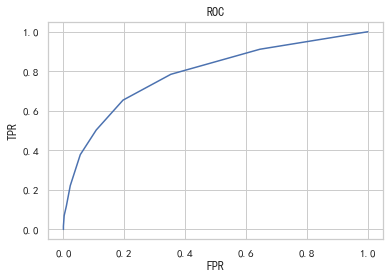

In [51]:
plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [52]:
roc_auc_score(y_test,y_pre_proba[:,1])

0.7867805936969796

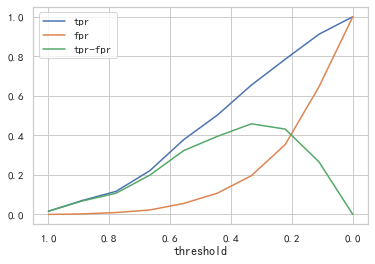

In [53]:
# KS曲线
plt.plot(thres[1:],tpr[1:])
plt.plot(thres[1:],fpr[1:])
plt.plot(thres[1:],tpr[1:]-fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr','fpr','tpr-fpr'])
plt.gca().invert_xaxis()
plt.show()

In [54]:
max(tpr-fpr)

0.4582171009079941